![Image Description](https://media.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif)


# Importing Libraries

In [6]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 682.7 kB/s eta 0:02:29
   ---------------------------------------- 0.1/101.1 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.4/101.1 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.9/101.1 MB 5.3 MB/s eta 0:00:19
   ---------------------------------------- 1.0/101.1 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 1.8/101.1 MB 6.7 MB/s eta 0:00:15
    --------------------------------------- 1.9

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,6)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Reading data

In [4]:
df=pd.read_csv(r"E:\GFG Datascience\PUBG game winner prediction\PUBG_Game_Prediction_data.csv")

In [5]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
df.shape

(4446966, 29)

In [7]:
df.info

<bound method DataFrame.info of                      Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  kill

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

Data wrangling is the process of transforming and structuring data from one raw form into a desired format with the intent of improving data quality and making it more consumable and useful for analytics or machine learning.

In [10]:
#check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [11]:
#remove that row
df.drop(2744604, inplace=True)

Understanding players distribution

In [12]:
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

In [13]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


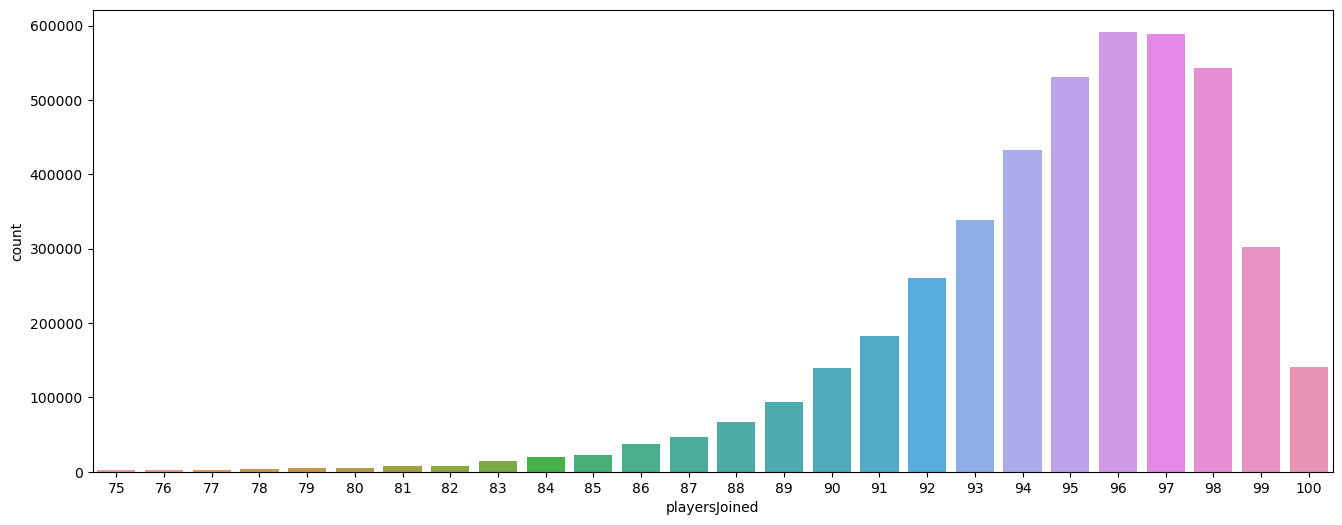

In [23]:
sns.countplot(data=df,x=df[df['playersJoined']>=75]['playersJoined'])
plt.show()

# Analysing the data

Kills without moving?

<center><img src="https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif"></center>


In [25]:
df['totalDistance']=df['rideDistance']+df['walkDistance']+df['swimDistance']
df['KillswithoutMoving']=((df['kills']>0)&(df['totalDistance']==0))

In [26]:
df[df['KillswithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,KillswithoutMoving


In [27]:
df[df['KillswithoutMoving']==True].shape

(0, 32)

In [28]:
df.drop(df[df['KillswithoutMoving']==True].index,inplace=True)

Extra-ordinary Road Kills?????

<center><img src="https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif"></center>


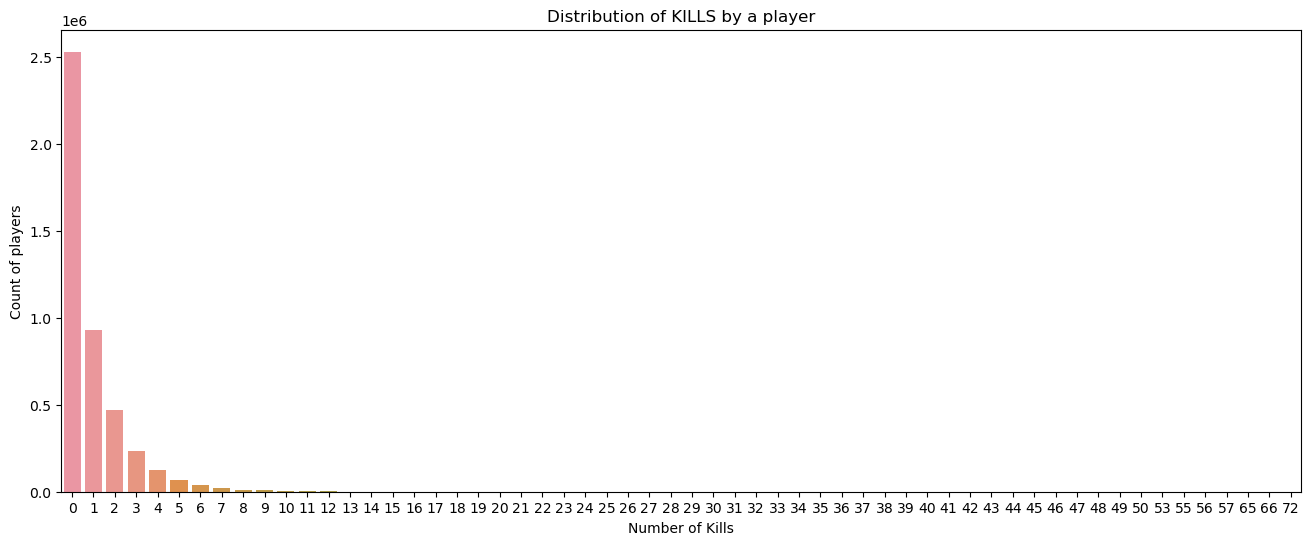

In [29]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

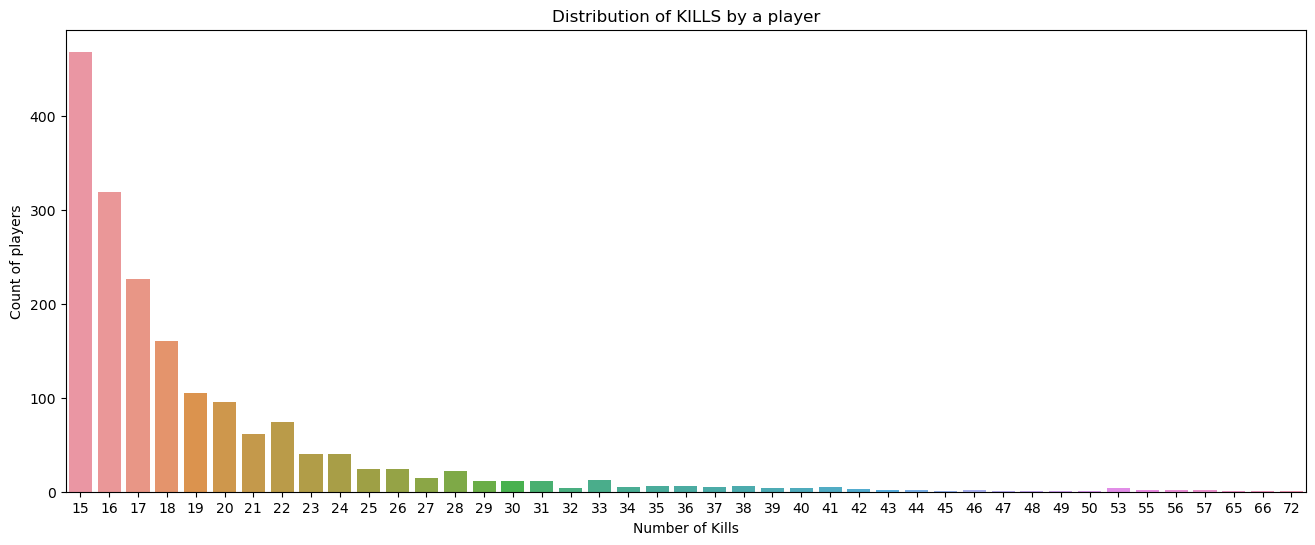

In [31]:
sns.countplot(data=df,x=df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [32]:
df[df['kills'] > 20].shape

(417, 32)

In [33]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

Head Shot


<div style="text-align:center">
    <img src="https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif">
</div>


In [37]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

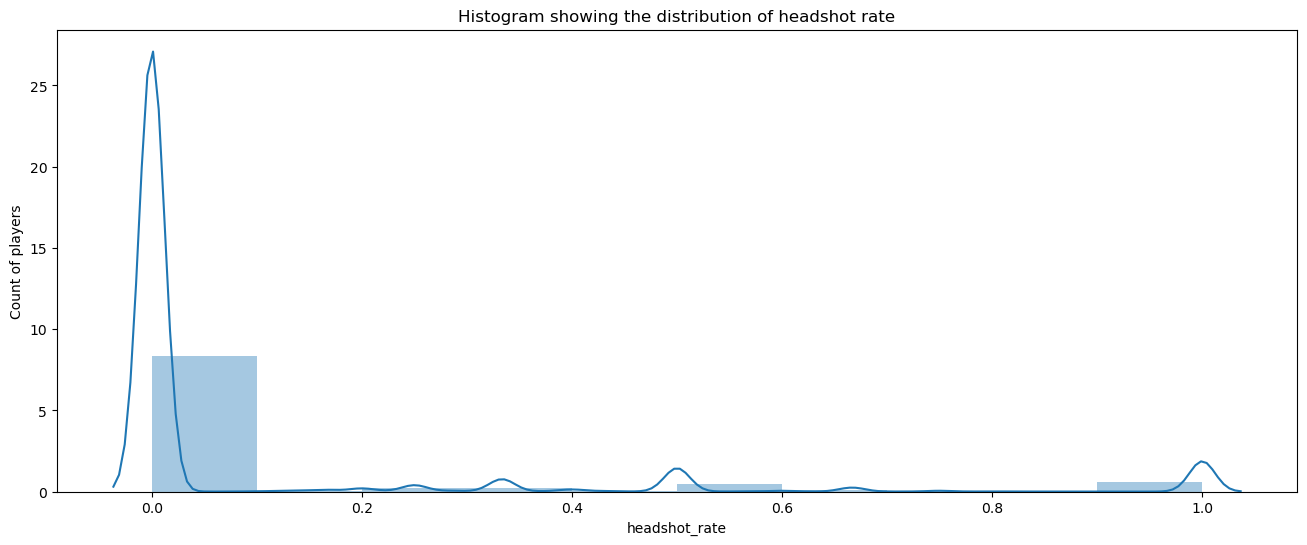

In [38]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [39]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [40]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

Longest Shot

<center><img src = "https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif"></center>

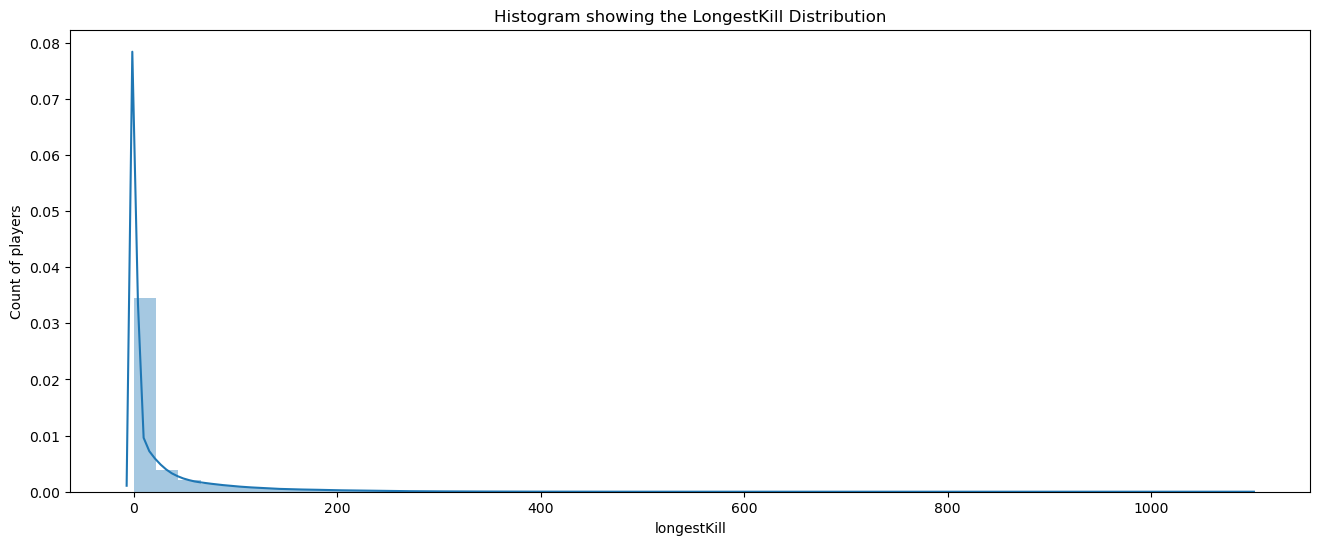

In [41]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [42]:
df[df['longestKill']>=500].shape

(1747, 33)

In [43]:
df.drop(df[df['longestKill']>=500].index, inplace = True)


# Weapon change

<center><img src = "https://j.gifs.com/3loOmn.gif"></center>

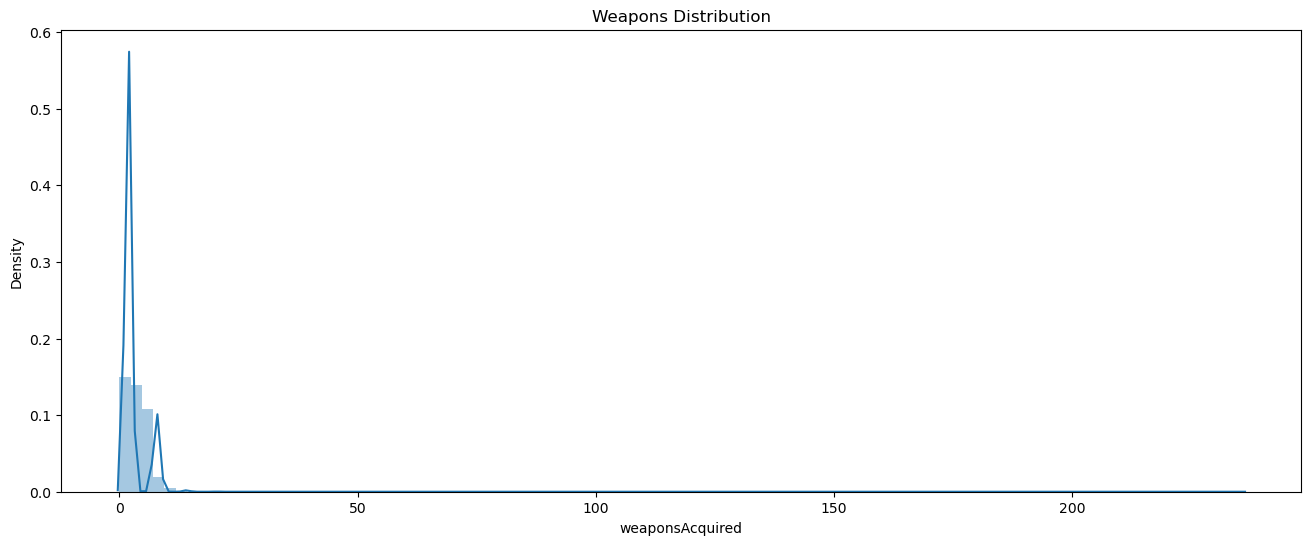

In [44]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [45]:
df[df['weaponsAcquired']>=15].shape


(6809, 33)

In [46]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

EDA

In [47]:
df.shape

(4436352, 33)

In [48]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
KillswithoutMoving    0
headshot_rate         0
dtype: int64

In [50]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

In [51]:
df_numeric.dropna(inplace=True)

In [54]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Id', 'groupId', 'matchId', 'matchType', 'KillswithoutMoving'], dtype='object')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436352 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   groupId             object 
 2   matchId             object 
 3   assists             int64  
 4   boosts              int64  
 5   damageDealt         float64
 6   DBNOs               int64  
 7   headshotKills       int64  
 8   heals               int64  
 9   killPlace           int64  
 10  killPoints          int64  
 11  kills               int64  
 12  killStreaks         int64  
 13  longestKill         float64
 14  matchDuration       int64  
 15  matchType           object 
 16  maxPlace            int64  
 17  numGroups           int64  
 18  rankPoints          int64  
 19  revives             int64  
 20  rideDistance        float64
 21  roadKills           int64  
 22  swimDistance        float64
 23  teamKills           int64  
 24  vehicleDestroys     int64  
 

In [57]:
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to object-type columns
label_encoder = LabelEncoder()
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

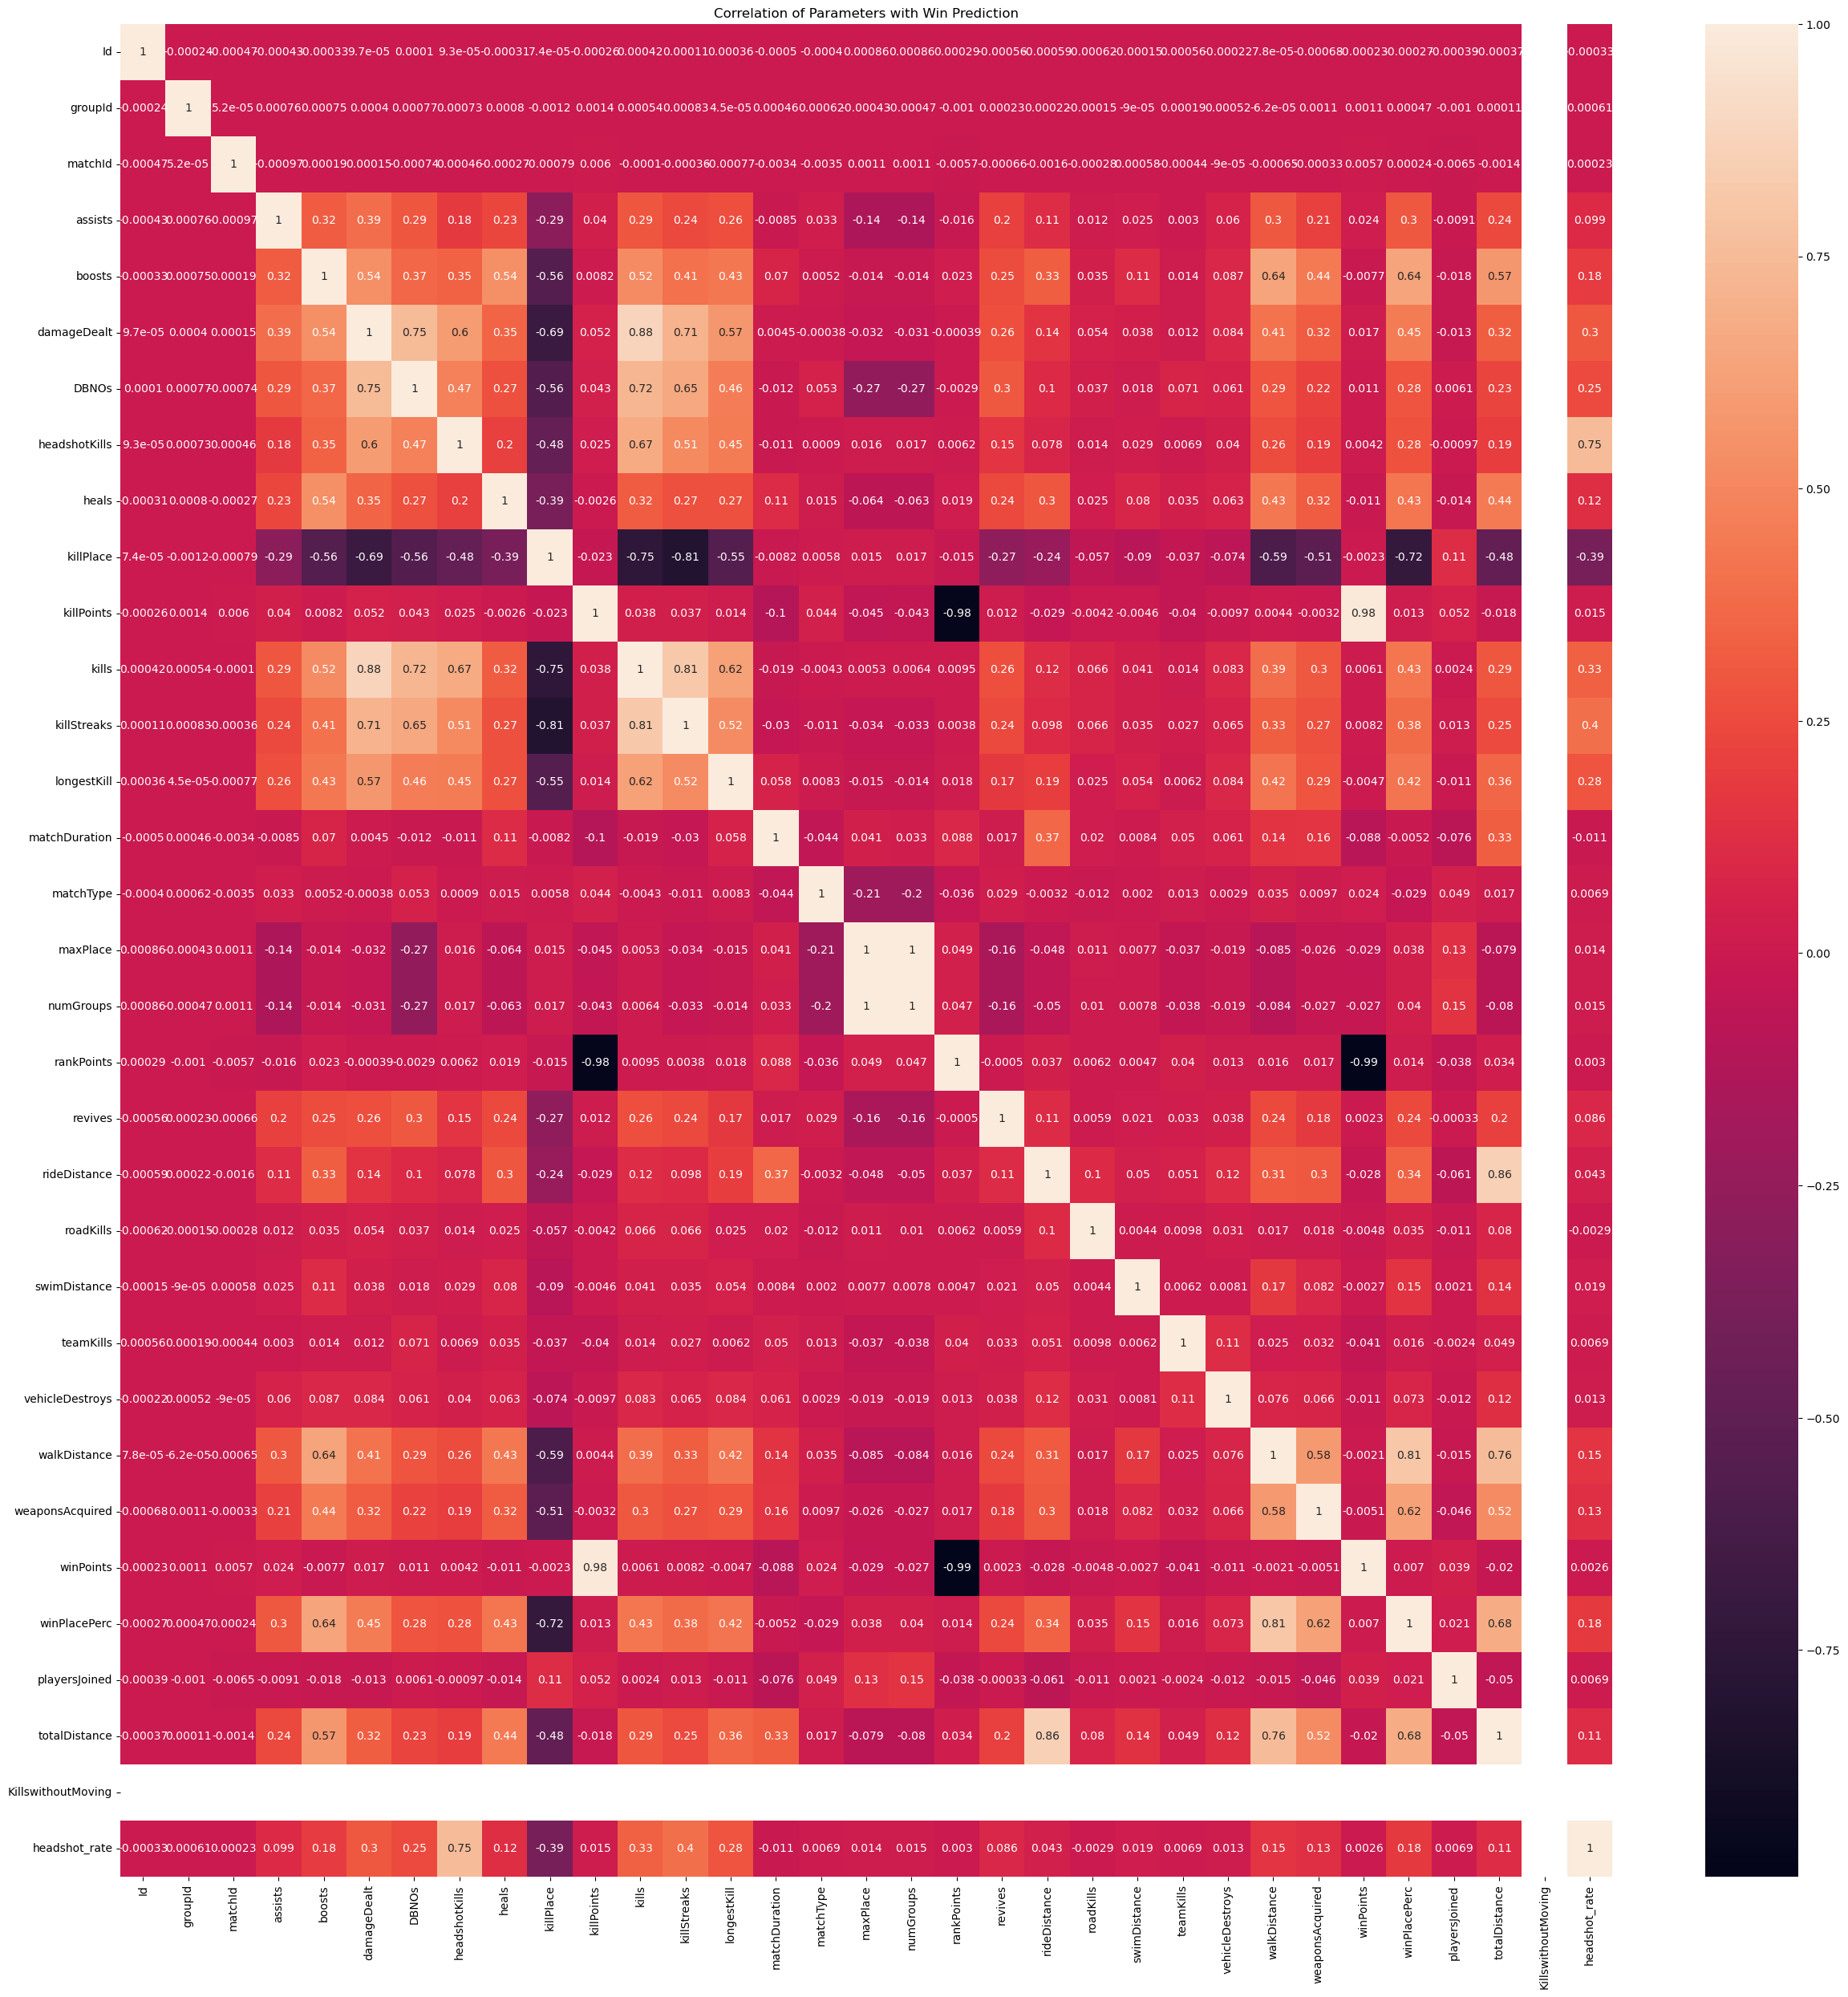

In [58]:
plt.figure(figsize=[30, 30])
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation of Parameters with Win Prediction')
plt.show()

# Feature Engineering

In [59]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [60]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [61]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'KillswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [62]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [63]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,KillswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,15,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,15,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,2,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,15,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,13,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# ML - CATBOOST MODEL

#### Handling categorical data

In [65]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [67]:
x = pd.get_dummies(x, columns = ['matchType', 'KillswithoutMoving'])


In [68]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_7,matchType_8,matchType_9,matchType_10,matchType_11,matchType_12,matchType_13,matchType_14,matchType_15,KillswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [69]:
x.shape

(4436352, 40)

In [70]:
features = x.columns

Scaling Data

In [71]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [72]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582935,-0.384009,0.449358,1.172481,-0.764891,-0.459622,-0.732889,-1.212386,-0.047599,-0.142509,...,-0.033604,-0.005244,-0.013802,-0.008292,-0.054367,-0.206521,-0.370794,-0.405072,1.236202,0.0
1,-0.582935,-0.384009,0.340069,-0.804730,-0.764891,-0.459622,-0.775862,0.803567,-0.047599,-0.142509,...,-0.033604,-0.005244,-0.013802,-0.008292,-0.054367,-0.206521,-0.370794,-0.405072,1.236202,0.0
2,-0.582935,-0.384009,-0.024227,-0.804730,-0.764891,-0.459622,0.169555,0.813070,-0.047599,-0.142509,...,-0.033604,-0.005244,-0.013802,-0.008292,-0.054367,-0.206521,-0.370794,-0.405072,-0.808929,0.0
3,-0.582935,-0.384009,0.995803,-0.804730,-0.764891,-0.459622,-0.560995,0.700393,-0.047599,-0.142509,...,-0.033604,-0.005244,-0.013802,-0.008292,-0.054367,-0.206521,-0.370794,-0.405072,1.236202,0.0
4,-0.582935,-0.384009,-0.097087,-0.804730,0.647325,0.727370,2.232285,0.906740,-0.047599,-0.142509,...,-0.033604,-0.005244,-0.013802,-0.008292,-0.054367,-0.206521,2.696912,-0.405072,-0.808929,0.0


Splitting Data

In [73]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [74]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105446, 40) (3105446,)
(1330906, 40) (1330906,)


CatBoost Model

In [75]:
import catboost as cb


In [76]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [77]:
model = cb.CatBoostRegressor(loss_function='RMSE')


In [78]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482932	test: 0.5481910	best: 0.5481910 (0)	total: 328ms	remaining: 32.5s
1:	learn: 0.5334432	test: 0.5333435	best: 0.5333435 (1)	total: 457ms	remaining: 22.4s
2:	learn: 0.5190863	test: 0.5189926	best: 0.5189926 (2)	total: 586ms	remaining: 18.9s
3:	learn: 0.5051719	test: 0.5050786	best: 0.5050786 (3)	total: 709ms	remaining: 17s
4:	learn: 0.4916907	test: 0.4915986	best: 0.4915986 (4)	total: 836ms	remaining: 15.9s
5:	learn: 0.4786722	test: 0.4785824	best: 0.4785824 (5)	total: 963ms	remaining: 15.1s
6:	learn: 0.4660820	test: 0.4659945	best: 0.4659945 (6)	total: 1.11s	remaining: 14.7s
7:	learn: 0.4538843	test: 0.4538022	best: 0.4538022 (7)	total: 1.25s	remaining: 14.4s
8:	learn: 0.4420866	test: 0.4420068	best: 0.4420068 (8)	total: 1.39s	remaining: 14.1s
9:	learn: 0.4307032	test: 0.4306256	best: 0.4306256 (9)	total: 1.52s	remaining: 13.7s
10:	learn: 0.4196864	test: 0.4196123	best: 0.4196123 (10)	total: 1.65s	remaining: 13.4s
11:	learn: 0.4089763	test: 0.4089034	best: 0.4089034 (

94:	learn: 0.1398327	test: 0.1400542	best: 0.1400542 (94)	total: 13.1s	remaining: 692ms
95:	learn: 0.1394506	test: 0.1396732	best: 0.1396732 (95)	total: 13.3s	remaining: 554ms
96:	learn: 0.1390783	test: 0.1393024	best: 0.1393024 (96)	total: 13.4s	remaining: 416ms
97:	learn: 0.1386674	test: 0.1388935	best: 0.1388935 (97)	total: 13.6s	remaining: 277ms
98:	learn: 0.1383166	test: 0.1385446	best: 0.1385446 (98)	total: 13.7s	remaining: 138ms
99:	learn: 0.1379804	test: 0.1382114	best: 0.1382114 (99)	total: 13.8s	remaining: 0us

bestTest = 0.1382114422
bestIteration = 99

0:	loss: 0.1382114	best: 0.1382114 (0)	total: 16.4s	remaining: 4m 6s
0:	learn: 0.5126337	test: 0.5125295	best: 0.5125295 (0)	total: 140ms	remaining: 13.8s
1:	learn: 0.4671297	test: 0.4670411	best: 0.4670411 (1)	total: 265ms	remaining: 13s
2:	learn: 0.4266212	test: 0.4265509	best: 0.4265509 (2)	total: 402ms	remaining: 13s
3:	learn: 0.3903370	test: 0.3902736	best: 0.3902736 (3)	total: 533ms	remaining: 12.8s
4:	learn: 0.3582286	

88:	learn: 0.1175619	test: 0.1178225	best: 0.1178225 (88)	total: 11.4s	remaining: 1.41s
89:	learn: 0.1174766	test: 0.1177387	best: 0.1177387 (89)	total: 11.5s	remaining: 1.28s
90:	learn: 0.1173708	test: 0.1176316	best: 0.1176316 (90)	total: 11.7s	remaining: 1.15s
91:	learn: 0.1172797	test: 0.1175409	best: 0.1175409 (91)	total: 11.8s	remaining: 1.02s
92:	learn: 0.1171957	test: 0.1174568	best: 0.1174568 (92)	total: 11.9s	remaining: 896ms
93:	learn: 0.1168685	test: 0.1171246	best: 0.1171246 (93)	total: 12s	remaining: 768ms
94:	learn: 0.1166272	test: 0.1168819	best: 0.1168819 (94)	total: 12.1s	remaining: 639ms
95:	learn: 0.1165274	test: 0.1167838	best: 0.1167838 (95)	total: 12.3s	remaining: 512ms
96:	learn: 0.1164365	test: 0.1166936	best: 0.1166936 (96)	total: 12.4s	remaining: 383ms
97:	learn: 0.1163526	test: 0.1166102	best: 0.1166102 (97)	total: 12.5s	remaining: 255ms
98:	learn: 0.1162614	test: 0.1165189	best: 0.1165189 (98)	total: 12.6s	remaining: 128ms
99:	learn: 0.1161853	test: 0.11644

82:	learn: 0.1459615	test: 0.1461548	best: 0.1461548 (82)	total: 11.4s	remaining: 9.2s
83:	learn: 0.1453394	test: 0.1455342	best: 0.1455342 (83)	total: 11.5s	remaining: 9.05s
84:	learn: 0.1447619	test: 0.1449596	best: 0.1449596 (84)	total: 11.7s	remaining: 8.91s
85:	learn: 0.1441466	test: 0.1443467	best: 0.1443467 (85)	total: 11.8s	remaining: 8.77s
86:	learn: 0.1436102	test: 0.1438134	best: 0.1438134 (86)	total: 11.9s	remaining: 8.64s
87:	learn: 0.1430935	test: 0.1433002	best: 0.1433002 (87)	total: 12s	remaining: 8.49s
88:	learn: 0.1425836	test: 0.1427919	best: 0.1427919 (88)	total: 12.2s	remaining: 8.35s
89:	learn: 0.1420525	test: 0.1422633	best: 0.1422633 (89)	total: 12.3s	remaining: 8.2s
90:	learn: 0.1415956	test: 0.1418087	best: 0.1418087 (90)	total: 12.4s	remaining: 8.05s
91:	learn: 0.1411420	test: 0.1413575	best: 0.1413575 (91)	total: 12.5s	remaining: 7.91s
92:	learn: 0.1407074	test: 0.1409248	best: 0.1409248 (92)	total: 12.7s	remaining: 7.78s
93:	learn: 0.1402863	test: 0.1405051

24:	learn: 0.1444265	test: 0.1446243	best: 0.1446243 (24)	total: 3.31s	remaining: 16.6s
25:	learn: 0.1424715	test: 0.1426777	best: 0.1426777 (25)	total: 3.44s	remaining: 16.4s
26:	learn: 0.1409722	test: 0.1411891	best: 0.1411891 (26)	total: 3.58s	remaining: 16.3s
27:	learn: 0.1395874	test: 0.1398083	best: 0.1398083 (27)	total: 3.73s	remaining: 16.2s
28:	learn: 0.1384291	test: 0.1386551	best: 0.1386551 (28)	total: 3.86s	remaining: 16.1s
29:	learn: 0.1371788	test: 0.1374116	best: 0.1374116 (29)	total: 4s	remaining: 16s
30:	learn: 0.1362042	test: 0.1364452	best: 0.1364452 (30)	total: 4.12s	remaining: 15.8s
31:	learn: 0.1353337	test: 0.1355772	best: 0.1355772 (31)	total: 4.26s	remaining: 15.7s
32:	learn: 0.1344232	test: 0.1346727	best: 0.1346727 (32)	total: 4.4s	remaining: 15.6s
33:	learn: 0.1337233	test: 0.1339789	best: 0.1339789 (33)	total: 4.51s	remaining: 15.4s
34:	learn: 0.1330671	test: 0.1333237	best: 0.1333237 (34)	total: 4.63s	remaining: 15.2s
35:	learn: 0.1319852	test: 0.1322356	b

118:	learn: 0.1136184	test: 0.1138704	best: 0.1138704 (118)	total: 14.5s	remaining: 3.77s
119:	learn: 0.1135520	test: 0.1138039	best: 0.1138039 (119)	total: 14.6s	remaining: 3.64s
120:	learn: 0.1132326	test: 0.1134815	best: 0.1134815 (120)	total: 14.7s	remaining: 3.53s
121:	learn: 0.1131781	test: 0.1134264	best: 0.1134264 (121)	total: 14.8s	remaining: 3.4s
122:	learn: 0.1131270	test: 0.1133760	best: 0.1133760 (122)	total: 15s	remaining: 3.28s
123:	learn: 0.1130714	test: 0.1133230	best: 0.1133230 (123)	total: 15.1s	remaining: 3.16s
124:	learn: 0.1130146	test: 0.1132657	best: 0.1132657 (124)	total: 15.2s	remaining: 3.04s
125:	learn: 0.1128345	test: 0.1130851	best: 0.1130851 (125)	total: 15.3s	remaining: 2.92s
126:	learn: 0.1127682	test: 0.1130194	best: 0.1130194 (126)	total: 15.4s	remaining: 2.8s
127:	learn: 0.1127156	test: 0.1129672	best: 0.1129672 (127)	total: 15.6s	remaining: 2.67s
128:	learn: 0.1124878	test: 0.1127358	best: 0.1127358 (128)	total: 15.7s	remaining: 2.55s
129:	learn: 0.

60:	learn: 0.1530478	test: 0.1531967	best: 0.1531967 (60)	total: 13s	remaining: 8.31s
61:	learn: 0.1512616	test: 0.1514143	best: 0.1514143 (61)	total: 13.2s	remaining: 8.11s
62:	learn: 0.1496635	test: 0.1498214	best: 0.1498214 (62)	total: 13.4s	remaining: 7.89s
63:	learn: 0.1480988	test: 0.1482587	best: 0.1482587 (63)	total: 13.6s	remaining: 7.68s
64:	learn: 0.1466429	test: 0.1468071	best: 0.1468071 (64)	total: 13.9s	remaining: 7.46s
65:	learn: 0.1452309	test: 0.1453971	best: 0.1453971 (65)	total: 14.1s	remaining: 7.25s
66:	learn: 0.1438826	test: 0.1440512	best: 0.1440512 (66)	total: 14.2s	remaining: 7.01s
67:	learn: 0.1426180	test: 0.1427905	best: 0.1427905 (67)	total: 14.4s	remaining: 6.79s
68:	learn: 0.1413865	test: 0.1415638	best: 0.1415638 (68)	total: 14.6s	remaining: 6.57s
69:	learn: 0.1402223	test: 0.1404043	best: 0.1404043 (69)	total: 14.8s	remaining: 6.35s
70:	learn: 0.1390945	test: 0.1392788	best: 0.1392788 (70)	total: 15s	remaining: 6.13s
71:	learn: 0.1380019	test: 0.1381875

53:	learn: 0.1050287	test: 0.1053303	best: 0.1053303 (53)	total: 10.9s	remaining: 9.25s
54:	learn: 0.1047803	test: 0.1050793	best: 0.1050793 (54)	total: 11.1s	remaining: 9.05s
55:	learn: 0.1045932	test: 0.1048938	best: 0.1048938 (55)	total: 11.3s	remaining: 8.85s
56:	learn: 0.1043554	test: 0.1046577	best: 0.1046577 (56)	total: 11.4s	remaining: 8.62s
57:	learn: 0.1040508	test: 0.1043506	best: 0.1043506 (57)	total: 11.6s	remaining: 8.39s
58:	learn: 0.1038955	test: 0.1041969	best: 0.1041969 (58)	total: 11.7s	remaining: 8.16s
59:	learn: 0.1037389	test: 0.1040404	best: 0.1040404 (59)	total: 11.9s	remaining: 7.96s
60:	learn: 0.1035309	test: 0.1038302	best: 0.1038302 (60)	total: 12.1s	remaining: 7.76s
61:	learn: 0.1033783	test: 0.1036788	best: 0.1036788 (61)	total: 12.3s	remaining: 7.55s
62:	learn: 0.1031584	test: 0.1034569	best: 0.1034569 (62)	total: 12.5s	remaining: 7.33s
63:	learn: 0.1026533	test: 0.1029452	best: 0.1029452 (63)	total: 12.7s	remaining: 7.15s
64:	learn: 0.1022030	test: 0.102

47:	learn: 0.1832845	test: 0.1833788	best: 0.1833788 (47)	total: 10.5s	remaining: 22.4s
48:	learn: 0.1802807	test: 0.1803803	best: 0.1803803 (48)	total: 10.7s	remaining: 22.1s
49:	learn: 0.1774717	test: 0.1775747	best: 0.1775747 (49)	total: 11s	remaining: 22s
50:	learn: 0.1747077	test: 0.1748147	best: 0.1748147 (50)	total: 11.2s	remaining: 21.7s
51:	learn: 0.1721531	test: 0.1722656	best: 0.1722656 (51)	total: 11.4s	remaining: 21.5s
52:	learn: 0.1696891	test: 0.1698049	best: 0.1698049 (52)	total: 11.6s	remaining: 21.2s
53:	learn: 0.1672229	test: 0.1673434	best: 0.1673434 (53)	total: 11.8s	remaining: 21s
54:	learn: 0.1648730	test: 0.1649971	best: 0.1649971 (54)	total: 12s	remaining: 20.8s
55:	learn: 0.1626287	test: 0.1627553	best: 0.1627553 (55)	total: 12.2s	remaining: 20.6s
56:	learn: 0.1605252	test: 0.1606567	best: 0.1606567 (56)	total: 12.5s	remaining: 20.4s
57:	learn: 0.1585436	test: 0.1586805	best: 0.1586805 (57)	total: 12.7s	remaining: 20.1s
58:	learn: 0.1566329	test: 0.1567740	bes

140:	learn: 0.1109810	test: 0.1112479	best: 0.1112479 (140)	total: 28.7s	remaining: 1.83s
141:	learn: 0.1107800	test: 0.1110466	best: 0.1110466 (141)	total: 28.9s	remaining: 1.63s
142:	learn: 0.1106523	test: 0.1109185	best: 0.1109185 (142)	total: 29s	remaining: 1.42s
143:	learn: 0.1105561	test: 0.1108230	best: 0.1108230 (143)	total: 29.2s	remaining: 1.22s
144:	learn: 0.1103832	test: 0.1106501	best: 0.1106501 (144)	total: 29.4s	remaining: 1.01s
145:	learn: 0.1101664	test: 0.1104319	best: 0.1104319 (145)	total: 29.6s	remaining: 811ms
146:	learn: 0.1100696	test: 0.1103355	best: 0.1103355 (146)	total: 29.8s	remaining: 608ms
147:	learn: 0.1098802	test: 0.1101443	best: 0.1101443 (147)	total: 30s	remaining: 405ms
148:	learn: 0.1097711	test: 0.1100361	best: 0.1100361 (148)	total: 30.2s	remaining: 202ms
149:	learn: 0.1095872	test: 0.1098522	best: 0.1098522 (149)	total: 30.4s	remaining: 0us

bestTest = 0.1098522187
bestIteration = 149

6:	loss: 0.1098522	best: 0.0961611 (5)	total: 2m 19s	remaini

83:	learn: 0.0980412	test: 0.0983068	best: 0.0983068 (83)	total: 16.5s	remaining: 13s
84:	learn: 0.0978610	test: 0.0981231	best: 0.0981231 (84)	total: 16.7s	remaining: 12.8s
85:	learn: 0.0977465	test: 0.0980059	best: 0.0980059 (85)	total: 16.8s	remaining: 12.5s
86:	learn: 0.0975986	test: 0.0978552	best: 0.0978552 (86)	total: 17s	remaining: 12.3s
87:	learn: 0.0975248	test: 0.0977819	best: 0.0977819 (87)	total: 17.2s	remaining: 12.1s
88:	learn: 0.0973936	test: 0.0976498	best: 0.0976498 (88)	total: 17.4s	remaining: 11.9s
89:	learn: 0.0971708	test: 0.0974274	best: 0.0974274 (89)	total: 17.6s	remaining: 11.7s
90:	learn: 0.0970198	test: 0.0972750	best: 0.0972750 (90)	total: 17.7s	remaining: 11.5s
91:	learn: 0.0968313	test: 0.0970893	best: 0.0970893 (91)	total: 17.9s	remaining: 11.3s
92:	learn: 0.0966505	test: 0.0969090	best: 0.0969090 (92)	total: 18.1s	remaining: 11.1s
93:	learn: 0.0964506	test: 0.0967076	best: 0.0967076 (93)	total: 18.3s	remaining: 10.9s
94:	learn: 0.0963904	test: 0.0966466

25:	learn: 0.2798351	test: 0.2798383	best: 0.2798383 (25)	total: 8.35s	remaining: 23.8s
26:	learn: 0.2730711	test: 0.2730788	best: 0.2730788 (26)	total: 8.66s	remaining: 23.4s
27:	learn: 0.2665368	test: 0.2665511	best: 0.2665511 (27)	total: 8.98s	remaining: 23.1s
28:	learn: 0.2602698	test: 0.2602873	best: 0.2602873 (28)	total: 9.31s	remaining: 22.8s
29:	learn: 0.2541971	test: 0.2542199	best: 0.2542199 (29)	total: 9.59s	remaining: 22.4s
30:	learn: 0.2483139	test: 0.2483413	best: 0.2483413 (30)	total: 9.9s	remaining: 22s
31:	learn: 0.2426449	test: 0.2426748	best: 0.2426748 (31)	total: 10.2s	remaining: 21.7s
32:	learn: 0.2371714	test: 0.2372055	best: 0.2372055 (32)	total: 10.5s	remaining: 21.4s
33:	learn: 0.2318908	test: 0.2319304	best: 0.2319304 (33)	total: 10.8s	remaining: 21.1s
34:	learn: 0.2268075	test: 0.2268510	best: 0.2268510 (34)	total: 11.2s	remaining: 20.8s
35:	learn: 0.2219275	test: 0.2219758	best: 0.2219758 (35)	total: 11.5s	remaining: 20.4s
36:	learn: 0.2171756	test: 0.217227

18:	learn: 0.1365835	test: 0.1367717	best: 0.1367717 (18)	total: 6s	remaining: 25.6s
19:	learn: 0.1314704	test: 0.1316694	best: 0.1316694 (19)	total: 6.31s	remaining: 25.3s
20:	learn: 0.1274324	test: 0.1276435	best: 0.1276435 (20)	total: 6.54s	remaining: 24.6s
21:	learn: 0.1239042	test: 0.1241267	best: 0.1241267 (21)	total: 6.84s	remaining: 24.3s
22:	learn: 0.1208529	test: 0.1210853	best: 0.1210853 (22)	total: 7.13s	remaining: 23.9s
23:	learn: 0.1182962	test: 0.1185368	best: 0.1185368 (23)	total: 7.4s	remaining: 23.4s
24:	learn: 0.1159357	test: 0.1161781	best: 0.1161781 (24)	total: 7.71s	remaining: 23.1s
25:	learn: 0.1140632	test: 0.1143123	best: 0.1143123 (25)	total: 7.93s	remaining: 22.6s
26:	learn: 0.1120906	test: 0.1123383	best: 0.1123383 (26)	total: 8.21s	remaining: 22.2s
27:	learn: 0.1103999	test: 0.1106466	best: 0.1106466 (27)	total: 8.48s	remaining: 21.8s
28:	learn: 0.1088803	test: 0.1091285	best: 0.1091285 (28)	total: 8.79s	remaining: 21.5s
29:	learn: 0.1077332	test: 0.1079868

11:	learn: 0.4029715	test: 0.4029159	best: 0.4029159 (11)	total: 3.81s	remaining: 43.8s
12:	learn: 0.3921509	test: 0.3921034	best: 0.3921034 (12)	total: 4.15s	remaining: 43.7s
13:	learn: 0.3816842	test: 0.3816398	best: 0.3816398 (13)	total: 4.48s	remaining: 43.5s
14:	learn: 0.3715413	test: 0.3715012	best: 0.3715012 (14)	total: 4.81s	remaining: 43.3s
15:	learn: 0.3617597	test: 0.3617241	best: 0.3617241 (15)	total: 5.14s	remaining: 43.1s
16:	learn: 0.3522783	test: 0.3522506	best: 0.3522506 (16)	total: 5.47s	remaining: 42.8s
17:	learn: 0.3430938	test: 0.3430699	best: 0.3430699 (17)	total: 5.8s	remaining: 42.5s
18:	learn: 0.3342525	test: 0.3342298	best: 0.3342298 (18)	total: 6.1s	remaining: 42.1s
19:	learn: 0.3256581	test: 0.3256389	best: 0.3256389 (19)	total: 6.42s	remaining: 41.7s
20:	learn: 0.3173697	test: 0.3173528	best: 0.3173528 (20)	total: 6.72s	remaining: 41.3s
21:	learn: 0.3093335	test: 0.3093214	best: 0.3093214 (21)	total: 7.03s	remaining: 40.9s
22:	learn: 0.3015462	test: 0.30153

105:	learn: 0.1068461	test: 0.1071006	best: 0.1071006 (105)	total: 32s	remaining: 13.3s
106:	learn: 0.1065296	test: 0.1067849	best: 0.1067849 (106)	total: 32.3s	remaining: 13s
107:	learn: 0.1062662	test: 0.1065239	best: 0.1065239 (107)	total: 32.6s	remaining: 12.7s
108:	learn: 0.1059809	test: 0.1062390	best: 0.1062390 (108)	total: 32.9s	remaining: 12.4s
109:	learn: 0.1057319	test: 0.1059908	best: 0.1059908 (109)	total: 33.2s	remaining: 12.1s
110:	learn: 0.1054035	test: 0.1056608	best: 0.1056608 (110)	total: 33.5s	remaining: 11.8s
111:	learn: 0.1051866	test: 0.1054465	best: 0.1054465 (111)	total: 33.7s	remaining: 11.4s
112:	learn: 0.1049124	test: 0.1051735	best: 0.1051735 (112)	total: 34s	remaining: 11.1s
113:	learn: 0.1046509	test: 0.1049114	best: 0.1049114 (113)	total: 34.3s	remaining: 10.8s
114:	learn: 0.1044096	test: 0.1046703	best: 0.1046703 (114)	total: 34.6s	remaining: 10.5s
115:	learn: 0.1041935	test: 0.1044550	best: 0.1044550 (115)	total: 35s	remaining: 10.2s
116:	learn: 0.1040

47:	learn: 0.0969518	test: 0.0972188	best: 0.0972188 (47)	total: 14.8s	remaining: 31.4s
48:	learn: 0.0966232	test: 0.0968892	best: 0.0968892 (48)	total: 15.1s	remaining: 31.1s
49:	learn: 0.0963029	test: 0.0965648	best: 0.0965648 (49)	total: 15.3s	remaining: 30.7s
50:	learn: 0.0959176	test: 0.0961717	best: 0.0961717 (50)	total: 15.6s	remaining: 30.3s
51:	learn: 0.0957559	test: 0.0960106	best: 0.0960106 (51)	total: 15.9s	remaining: 29.9s
52:	learn: 0.0953062	test: 0.0955584	best: 0.0955584 (52)	total: 16.1s	remaining: 29.5s
53:	learn: 0.0950625	test: 0.0953186	best: 0.0953186 (53)	total: 16.4s	remaining: 29.2s
54:	learn: 0.0947494	test: 0.0949988	best: 0.0949988 (54)	total: 16.7s	remaining: 28.8s
55:	learn: 0.0942883	test: 0.0945363	best: 0.0945363 (55)	total: 17s	remaining: 28.6s
56:	learn: 0.0939312	test: 0.0941739	best: 0.0941739 (56)	total: 17.3s	remaining: 28.2s
57:	learn: 0.0936701	test: 0.0939142	best: 0.0939142 (57)	total: 17.6s	remaining: 27.9s
58:	learn: 0.0935138	test: 0.09375

140:	learn: 0.0848173	test: 0.0849708	best: 0.0849708 (140)	total: 40.4s	remaining: 2.58s
141:	learn: 0.0847530	test: 0.0849080	best: 0.0849080 (141)	total: 40.7s	remaining: 2.29s
142:	learn: 0.0847221	test: 0.0848765	best: 0.0848765 (142)	total: 40.9s	remaining: 2s
143:	learn: 0.0846504	test: 0.0848066	best: 0.0848066 (143)	total: 41.2s	remaining: 1.72s
144:	learn: 0.0846133	test: 0.0847709	best: 0.0847709 (144)	total: 41.4s	remaining: 1.43s
145:	learn: 0.0845747	test: 0.0847314	best: 0.0847314 (145)	total: 41.7s	remaining: 1.14s
146:	learn: 0.0844998	test: 0.0846572	best: 0.0846572 (146)	total: 42s	remaining: 857ms
147:	learn: 0.0844465	test: 0.0846036	best: 0.0846036 (147)	total: 42.3s	remaining: 571ms
148:	learn: 0.0844006	test: 0.0845562	best: 0.0845562 (148)	total: 42.5s	remaining: 285ms
149:	learn: 0.0843648	test: 0.0845190	best: 0.0845190 (149)	total: 42.7s	remaining: 0us

bestTest = 0.08451898337
bestIteration = 149

11:	loss: 0.0845190	best: 0.0845190 (11)	total: 5m 16s	remai

83:	learn: 0.1098484	test: 0.1100347	best: 0.1100347 (83)	total: 30.2s	remaining: 5.75s
84:	learn: 0.1091641	test: 0.1093526	best: 0.1093526 (84)	total: 30.5s	remaining: 5.38s
85:	learn: 0.1085234	test: 0.1087135	best: 0.1087135 (85)	total: 30.8s	remaining: 5.01s
86:	learn: 0.1079240	test: 0.1081152	best: 0.1081152 (86)	total: 31.1s	remaining: 4.65s
87:	learn: 0.1073230	test: 0.1075163	best: 0.1075163 (87)	total: 31.4s	remaining: 4.28s
88:	learn: 0.1067642	test: 0.1069585	best: 0.1069585 (88)	total: 31.7s	remaining: 3.92s
89:	learn: 0.1061982	test: 0.1063939	best: 0.1063939 (89)	total: 32s	remaining: 3.56s
90:	learn: 0.1056899	test: 0.1058868	best: 0.1058868 (90)	total: 32.3s	remaining: 3.2s
91:	learn: 0.1051966	test: 0.1053950	best: 0.1053950 (91)	total: 32.6s	remaining: 2.84s
92:	learn: 0.1047227	test: 0.1049221	best: 0.1049221 (92)	total: 32.9s	remaining: 2.48s
93:	learn: 0.1042243	test: 0.1044261	best: 0.1044261 (93)	total: 33.2s	remaining: 2.12s
94:	learn: 0.1037528	test: 0.103956

76:	learn: 0.0858185	test: 0.0859995	best: 0.0859995 (76)	total: 26s	remaining: 7.76s
77:	learn: 0.0857162	test: 0.0858949	best: 0.0858949 (77)	total: 26.3s	remaining: 7.41s
78:	learn: 0.0856412	test: 0.0858207	best: 0.0858207 (78)	total: 26.6s	remaining: 7.07s
79:	learn: 0.0855224	test: 0.0857002	best: 0.0857002 (79)	total: 26.9s	remaining: 6.71s
80:	learn: 0.0854730	test: 0.0856509	best: 0.0856509 (80)	total: 27.2s	remaining: 6.37s
81:	learn: 0.0854241	test: 0.0856011	best: 0.0856011 (81)	total: 27.5s	remaining: 6.03s
82:	learn: 0.0853637	test: 0.0855412	best: 0.0855412 (82)	total: 27.8s	remaining: 5.7s
83:	learn: 0.0852745	test: 0.0854489	best: 0.0854489 (83)	total: 28.1s	remaining: 5.36s
84:	learn: 0.0852164	test: 0.0853906	best: 0.0853906 (84)	total: 28.5s	remaining: 5.03s
85:	learn: 0.0851361	test: 0.0853086	best: 0.0853086 (85)	total: 28.8s	remaining: 4.69s
86:	learn: 0.0849852	test: 0.0851558	best: 0.0851558 (86)	total: 29.1s	remaining: 4.35s
87:	learn: 0.0849087	test: 0.085080

69:	learn: 0.1236156	test: 0.1237756	best: 0.1237756 (69)	total: 25.5s	remaining: 29.1s
70:	learn: 0.1223784	test: 0.1225398	best: 0.1225398 (70)	total: 25.8s	remaining: 28.7s
71:	learn: 0.1211550	test: 0.1213187	best: 0.1213187 (71)	total: 26.2s	remaining: 28.4s
72:	learn: 0.1199874	test: 0.1201543	best: 0.1201543 (72)	total: 26.6s	remaining: 28s
73:	learn: 0.1188360	test: 0.1190038	best: 0.1190038 (73)	total: 26.9s	remaining: 27.7s
74:	learn: 0.1177090	test: 0.1178781	best: 0.1178781 (74)	total: 27.3s	remaining: 27.3s
75:	learn: 0.1167173	test: 0.1168879	best: 0.1168879 (75)	total: 27.7s	remaining: 27s
76:	learn: 0.1157009	test: 0.1158709	best: 0.1158709 (76)	total: 28s	remaining: 26.6s
77:	learn: 0.1147460	test: 0.1149174	best: 0.1149174 (77)	total: 28.4s	remaining: 26.2s
78:	learn: 0.1137883	test: 0.1139613	best: 0.1139613 (78)	total: 28.8s	remaining: 25.9s
79:	learn: 0.1129264	test: 0.1131035	best: 0.1131035 (79)	total: 29.1s	remaining: 25.5s
80:	learn: 0.1120911	test: 0.1122705	b

11:	learn: 0.1938583	test: 0.1939196	best: 0.1939196 (11)	total: 4.68s	remaining: 53.8s
12:	learn: 0.1807187	test: 0.1807971	best: 0.1807971 (12)	total: 5.05s	remaining: 53.2s
13:	learn: 0.1691721	test: 0.1692660	best: 0.1692660 (13)	total: 5.45s	remaining: 52.9s
14:	learn: 0.1590933	test: 0.1592028	best: 0.1592028 (14)	total: 5.86s	remaining: 52.7s
15:	learn: 0.1502647	test: 0.1503928	best: 0.1503928 (15)	total: 6.24s	remaining: 52.3s
16:	learn: 0.1426299	test: 0.1427684	best: 0.1427684 (16)	total: 6.58s	remaining: 51.5s
17:	learn: 0.1357232	test: 0.1358733	best: 0.1358733 (17)	total: 6.95s	remaining: 51s
18:	learn: 0.1299138	test: 0.1300703	best: 0.1300703 (18)	total: 7.34s	remaining: 50.6s
19:	learn: 0.1249242	test: 0.1250878	best: 0.1250878 (19)	total: 7.72s	remaining: 50.2s
20:	learn: 0.1205664	test: 0.1207418	best: 0.1207418 (20)	total: 8.09s	remaining: 49.7s
21:	learn: 0.1169693	test: 0.1171545	best: 0.1171545 (21)	total: 8.46s	remaining: 49.2s
22:	learn: 0.1135884	test: 0.11377

105:	learn: 0.0836168	test: 0.0837740	best: 0.0837740 (105)	total: 37s	remaining: 15.4s
106:	learn: 0.0835636	test: 0.0837206	best: 0.0837206 (106)	total: 37.4s	remaining: 15s
107:	learn: 0.0835278	test: 0.0836845	best: 0.0836845 (107)	total: 37.7s	remaining: 14.7s
108:	learn: 0.0834610	test: 0.0836176	best: 0.0836176 (108)	total: 38s	remaining: 14.3s
109:	learn: 0.0833978	test: 0.0835527	best: 0.0835527 (109)	total: 38.4s	remaining: 13.9s
110:	learn: 0.0833385	test: 0.0834934	best: 0.0834934 (110)	total: 38.7s	remaining: 13.6s
111:	learn: 0.0832951	test: 0.0834497	best: 0.0834497 (111)	total: 38.9s	remaining: 13.2s
112:	learn: 0.0832653	test: 0.0834207	best: 0.0834207 (112)	total: 39.2s	remaining: 12.8s
113:	learn: 0.0832177	test: 0.0833726	best: 0.0833726 (113)	total: 39.5s	remaining: 12.5s
114:	learn: 0.0831648	test: 0.0833204	best: 0.0833204 (114)	total: 39.9s	remaining: 12.1s
115:	learn: 0.0831212	test: 0.0832787	best: 0.0832787 (115)	total: 40.1s	remaining: 11.8s
116:	learn: 0.08

46:	learn: 0.0914167	test: 0.0914290	best: 0.0914290 (46)	total: 14.1s	remaining: 30.8s
47:	learn: 0.0912444	test: 0.0912570	best: 0.0912570 (47)	total: 14.3s	remaining: 30.4s
48:	learn: 0.0910172	test: 0.0910309	best: 0.0910309 (48)	total: 14.6s	remaining: 30s
49:	learn: 0.0906636	test: 0.0906747	best: 0.0906747 (49)	total: 14.8s	remaining: 29.6s
50:	learn: 0.0904152	test: 0.0904236	best: 0.0904236 (50)	total: 15.1s	remaining: 29.3s
51:	learn: 0.0901277	test: 0.0901327	best: 0.0901327 (51)	total: 15.4s	remaining: 29s
52:	learn: 0.0898981	test: 0.0899024	best: 0.0899024 (52)	total: 15.6s	remaining: 28.6s
53:	learn: 0.0895061	test: 0.0895049	best: 0.0895049 (53)	total: 15.9s	remaining: 28.3s
54:	learn: 0.0893612	test: 0.0893621	best: 0.0893621 (54)	total: 16.2s	remaining: 27.9s
55:	learn: 0.0890291	test: 0.0890289	best: 0.0890289 (55)	total: 16.5s	remaining: 27.7s
56:	learn: 0.0888870	test: 0.0888863	best: 0.0888863 (56)	total: 16.8s	remaining: 27.4s
57:	learn: 0.0887450	test: 0.0887423

139:	learn: 0.0825595	test: 0.0826288	best: 0.0826288 (139)	total: 39.4s	remaining: 2.81s
140:	learn: 0.0825203	test: 0.0825891	best: 0.0825891 (140)	total: 39.7s	remaining: 2.53s
141:	learn: 0.0825052	test: 0.0825743	best: 0.0825743 (141)	total: 40s	remaining: 2.25s
142:	learn: 0.0824701	test: 0.0825399	best: 0.0825399 (142)	total: 40.3s	remaining: 1.97s
143:	learn: 0.0824461	test: 0.0825171	best: 0.0825171 (143)	total: 40.5s	remaining: 1.69s
144:	learn: 0.0824278	test: 0.0825001	best: 0.0825001 (144)	total: 40.8s	remaining: 1.41s
145:	learn: 0.0823928	test: 0.0824653	best: 0.0824653 (145)	total: 41s	remaining: 1.12s
146:	learn: 0.0823500	test: 0.0824221	best: 0.0824221 (146)	total: 41.3s	remaining: 842ms
147:	learn: 0.0823286	test: 0.0824040	best: 0.0824040 (147)	total: 41.6s	remaining: 562ms
148:	learn: 0.0823012	test: 0.0823803	best: 0.0823803 (148)	total: 41.9s	remaining: 281ms
149:	learn: 0.0822856	test: 0.0823671	best: 0.0823671 (149)	total: 42.1s	remaining: 0us

bestTest = 0.08

82:	learn: 0.0857152	test: 0.0858077	best: 0.0858077 (82)	total: 23.9s	remaining: 19.3s
83:	learn: 0.0856513	test: 0.0857433	best: 0.0857433 (83)	total: 24.2s	remaining: 19s
84:	learn: 0.0855836	test: 0.0856741	best: 0.0856741 (84)	total: 24.6s	remaining: 18.8s
85:	learn: 0.0854908	test: 0.0855855	best: 0.0855855 (85)	total: 24.8s	remaining: 18.5s
86:	learn: 0.0854441	test: 0.0855407	best: 0.0855407 (86)	total: 25.1s	remaining: 18.2s
87:	learn: 0.0853927	test: 0.0854894	best: 0.0854894 (87)	total: 25.4s	remaining: 17.9s
88:	learn: 0.0852879	test: 0.0853858	best: 0.0853858 (88)	total: 25.7s	remaining: 17.6s
89:	learn: 0.0852215	test: 0.0853183	best: 0.0853183 (89)	total: 26s	remaining: 17.3s
90:	learn: 0.0851588	test: 0.0852564	best: 0.0852564 (90)	total: 26.3s	remaining: 17s
91:	learn: 0.0851010	test: 0.0851984	best: 0.0851984 (91)	total: 26.6s	remaining: 16.8s
92:	learn: 0.0849753	test: 0.0850735	best: 0.0850735 (92)	total: 26.9s	remaining: 16.5s
93:	learn: 0.0848985	test: 0.0849968	b

24:	learn: 0.1094743	test: 0.1095704	best: 0.1095704 (24)	total: 7.25s	remaining: 36.2s
25:	learn: 0.1071079	test: 0.1072120	best: 0.1072120 (25)	total: 7.51s	remaining: 35.8s
26:	learn: 0.1053662	test: 0.1054756	best: 0.1054756 (26)	total: 7.81s	remaining: 35.6s
27:	learn: 0.1039931	test: 0.1041092	best: 0.1041092 (27)	total: 8.07s	remaining: 35.2s
28:	learn: 0.1027253	test: 0.1028518	best: 0.1028518 (28)	total: 8.36s	remaining: 34.9s
29:	learn: 0.1014661	test: 0.1015961	best: 0.1015961 (29)	total: 8.68s	remaining: 34.7s
30:	learn: 0.1004732	test: 0.1006101	best: 0.1006101 (30)	total: 8.94s	remaining: 34.3s
31:	learn: 0.0993654	test: 0.0995057	best: 0.0995057 (31)	total: 9.26s	remaining: 34.2s
32:	learn: 0.0985344	test: 0.0986800	best: 0.0986800 (32)	total: 9.54s	remaining: 33.8s
33:	learn: 0.0978169	test: 0.0979673	best: 0.0979673 (33)	total: 9.79s	remaining: 33.4s
34:	learn: 0.0971502	test: 0.0973037	best: 0.0973037 (34)	total: 10.1s	remaining: 33.2s
35:	learn: 0.0966414	test: 0.096

119:	learn: 0.0831317	test: 0.0833493	best: 0.0833493 (119)	total: 33.8s	remaining: 8.44s
120:	learn: 0.0830850	test: 0.0833031	best: 0.0833031 (120)	total: 34s	remaining: 8.14s
121:	learn: 0.0830495	test: 0.0832683	best: 0.0832683 (121)	total: 34.2s	remaining: 7.84s
122:	learn: 0.0830015	test: 0.0832206	best: 0.0832206 (122)	total: 34.4s	remaining: 7.55s
123:	learn: 0.0829638	test: 0.0831832	best: 0.0831832 (123)	total: 34.7s	remaining: 7.27s
124:	learn: 0.0829340	test: 0.0831525	best: 0.0831525 (124)	total: 34.9s	remaining: 6.98s
125:	learn: 0.0829036	test: 0.0831224	best: 0.0831224 (125)	total: 35.2s	remaining: 6.7s
126:	learn: 0.0828773	test: 0.0830964	best: 0.0830964 (126)	total: 35.5s	remaining: 6.42s
127:	learn: 0.0828455	test: 0.0830616	best: 0.0830616 (127)	total: 35.7s	remaining: 6.14s
128:	learn: 0.0828181	test: 0.0830366	best: 0.0830366 (128)	total: 36s	remaining: 5.85s
129:	learn: 0.0827807	test: 0.0829992	best: 0.0829992 (129)	total: 36.2s	remaining: 5.58s
130:	learn: 0.0

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [79]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [80]:
feature_importance_df

,features,importance
2,killPlace,41.143871
20,traveldistance,15.658944
14,totalDistance,9.161138
16,killsNorm,7.885282
4,killStreaks,5.743834
19,matchDurationNorm,4.874489
13,playersJoined,4.541944
5,longestKill,3.417796
6,numGroups,1.802902
21,healsnboosts,1.737837


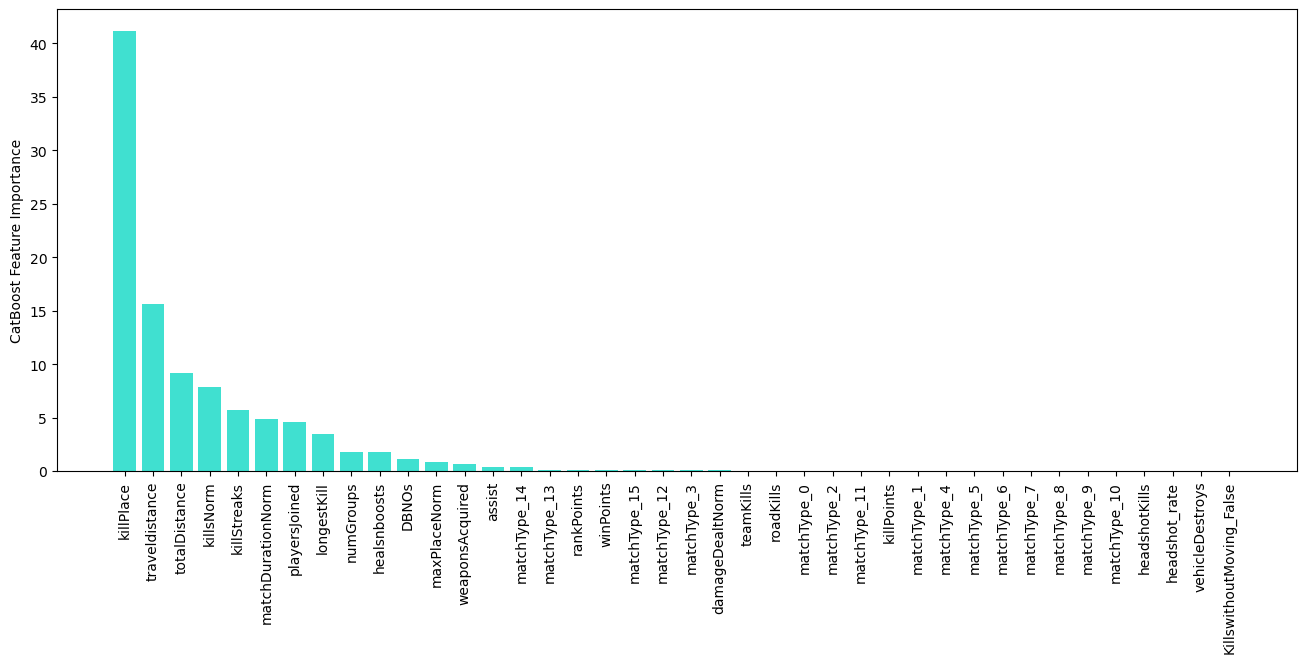

In [81]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

Prediction

In [82]:
pred = model.predict(xtest)


In [83]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>